<h1 style='font-size:40px'> Cumulative Distribution Functions</h1>

<h2 style='font-size:30px'> Percentiles</h2>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Percentis indicam a portentagem de instâncias em uma ordenação que se encontram abaixo de um valor.
        </li>
    </ul>
</div>

In [1]:
import numpy as np
array = np.random.randint(0, 50, size=20)

# O quintgésimo percentil (ou a mediana) do array é -0.0013.
x = np.random.randn(10000)
np.percentile(x, 50), np.median(x)

(0.00043111858013362964, 0.00043111858013362964)

<h2 style='font-size:30px'> CDFs</h2>
<div> 
    <ul style='font-size:20px'>
        <li> 
            CDF's, assim como os percentis, quantificam a grandeza de um valor de uma ordenação em comparação com os demais. No entanto, a sua escala é de 0 a 100, e não 0 a 1.
        </li>
        <li> 
            Valores acima do máximo do array recebem CDF=1; os menores do que o mínimo, 0.
        </li>
    </ul>
</div>

<AxesSubplot:>

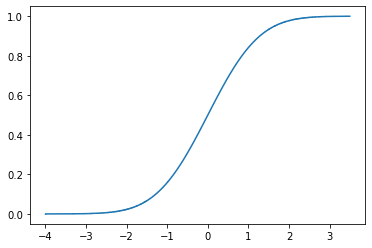

In [2]:
from scipy.stats import norm
import seaborn as sns
cdf = norm.cdf(x)
sns.lineplot(x=x, y=cdf, drawstyle='steps')

<h2 style='font-size:30px'> Representing CDF's</h2>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Com os conceitos em mente, vamos montar um gráfico de CDF nos baseando nas durações de gravidez do NSFG.
        </li>
    </ul>
</div>

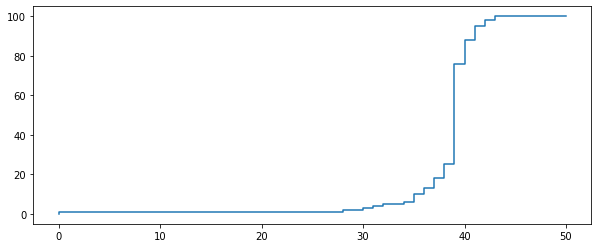

In [51]:
import matplotlib.pyplot as plt
percentile_values = [live.prglngth.quantile(i/100) for i in range(101)]

# Podemos notar a escassez de gravidez abaixo das 30 semanas.
# A reta vertical na marca de 39 semanas sinaliza a moda das durações de gravidez.
plt.figure(figsize=(10,4))
plt.step(percentile_values, list(range(101)))

<h2 style='font-size:30px'> Comparing CDF's</h2>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Compararemos agora as CDF's de massa para primogêntios com outros bebês.
        </li>
    </ul>
</div>

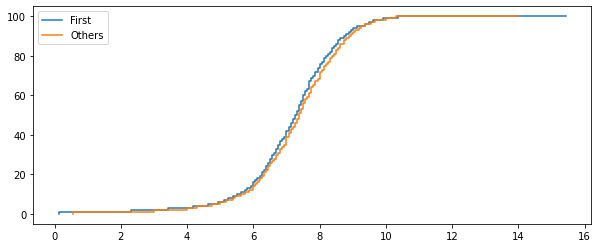

In [70]:
# Segregando os grupos.
first, others = live[live.birthord==1], live[live.birthord!=1]
dfs = (first, others)
labels =  ('First', 'Others')

# Notamos que os primogênitos tendem a ser um pouco mais leves do que os seus sucessores.
plt.figure(figsize=(10,4))
for df, label in zip(dfs, labels):
    percentile_values = [df.totalwgt_lb.quantile(i/100) for i in range(101)]
    plt.step(percentile_values,list(range(101)), label=label)
plt.legend()

<h2 style='font-size:30px'> Random Numbers</h2>

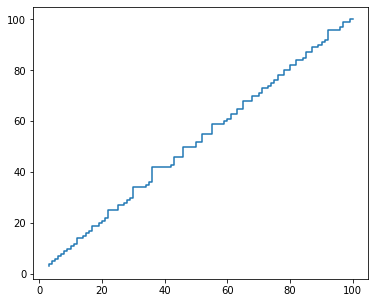

In [199]:
from scipy.stats import scoreatpercentile
sample = np.random.choice(live.totalwgt_lb, size=100, replace=True)
sample = np.nan_to_num(sample, np.nanmean(sample))

sample_percentiles = [percentileofscore(sample, element, kind='weak') for element in sample]
percentiles_percentiles = [percentileofscore(sample_percentiles, element, kind='weak') for element in 
                          sample_percentiles]

plt.figure(figsize=(6,5))
plt.step(sorted(sample_percentiles), sorted(percentiles_percentiles))


In [211]:
a = np.random.random(1000)

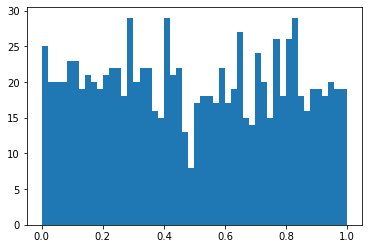

In [218]:
plt.hist(a, bins=50);

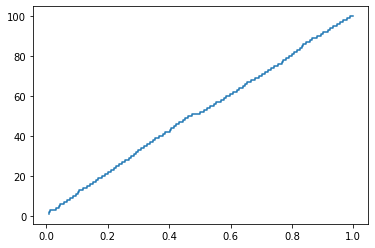

In [213]:
plt.step([np.percentile(a, i) for i in range(1, 101)], range(1,101))

<p style='color:red'> Comparing Percentiles Ranks